In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
user_df = pd.read_csv("/content/users.csv")
user_df

,user_id,name,email,age,country,date
0,15000,James Scott,james.scott660@gmail.com,35,India,2024-11-01
1,15001,Sharon Ferrell,sharon.ferrell49@gmail.com,26,Australia,2024-11-01
2,15002,Chelsea Ortiz,chelsea.ortiz643@gmail.com,38,United Kingdom,2024-11-01
3,15003,Gregory Pearson,gregory.pearson379@gmail.com,52,United Kingdom,2024-11-01
4,15004,Connie Gonzales,connie.gonzales481@gmail.com,43,Australia,2024-11-01
...,...,...,...,...,...,...
2046,16996,Erin Jacobs,erin.jacobs381@gmail.com,26,XYZ,2025-01-30
2047,16997,Deanna Randolph,deanna.randolph420@gmail.com,27,United States,2025-01-30
2048,16998,Brandon Jacobs,brandon.jacobs266@gmail.com,21,United Kingdom,2025-01-30
2049,16999,Frederick Bell,frederick.bell509@gmail.com,60,United Kingdom,2025-01-30


In [ ]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  2051 non-null   int64 
 1   name     2051 non-null   object
 2   email    2036 non-null   object
 3   age      2051 non-null   int64 
 4   country  2044 non-null   object
 5   date     2051 non-null   object
dtypes: int64(2), object(4)
memory usage: 96.3+ KB


In [ ]:
#cleaning the data
#1) to check the null values
user_df.isnull().sum()

,0
user_id,0
name,0
email,15
age,0
country,7
date,0


In [ ]:
user_df.isnull().sum().sum()

np.int64(22)

In [ ]:
#we have 22 null values
#but we can't replace null values because gmail_id will be unique or every person
#hence we have few null values we can drop those null values
user_df.dropna(inplace=True)

In [ ]:
user_df.isnull().sum()#we have successfully droped the null values

,0
user_id,0
name,0
email,0
age,0
country,0
date,0


In [ ]:
#check the duplicated values
user_df.duplicated().sum()

np.int64(41)

In [ ]:
#we have 41 duplicated values hence drop the duplicated values

In [ ]:
user_df.drop_duplicates(inplace = True)

In [ ]:
user_df.duplicated().sum()#we have dropped the null values

np.int64(0)

In [ ]:
#now it is time to check the outliers
user_df.columns

Index(['user_id', 'name', 'email', 'age', 'country', 'date'], dtype='object')

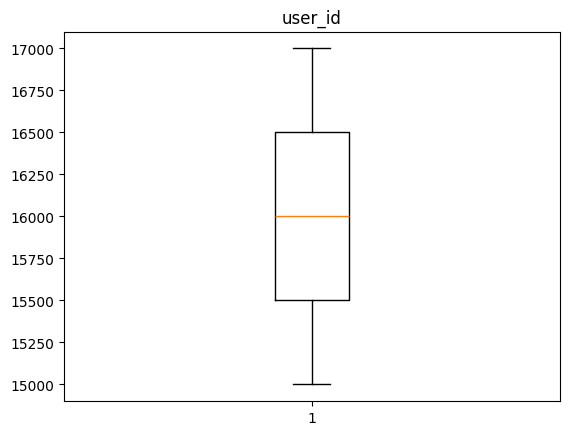

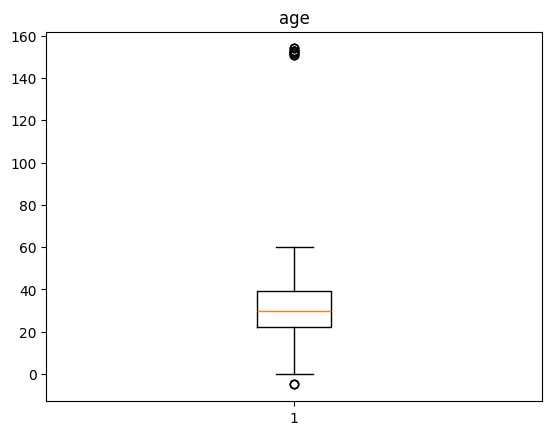

In [ ]:
for col in user_df.columns:
  if user_df[col].dtype!='object':
    plt.boxplot(user_df[col])#boxplot is used to view outliers
    plt.title(col)
    plt.show()

In [ ]:
#we have outliers in the Age coulmn
#we can ignore that outliers as it is less than 30% in the data
#orelse we have to deal with outliers because thy may effect our data


In [ ]:
#dealing with outlier
for i in user_df.columns:
  if user_df[i].dtype!='object':
    Q1 = user_df[i].quantile(0.25) # the value which is less than 25% and the values greater than 75% is considered as outliers
    Q3 = user_df[i].quantile(0.75)
    IQR = Q3-Q1  #IQR refers to Inter Quatile Range
    Lower_fence = Q1-1.5*IQR
    upper_fence = Q3+1.5*IQR
    user_df = user_df[(user_df[i]>=Lower_fence) & (user_df[i]<=upper_fence)]

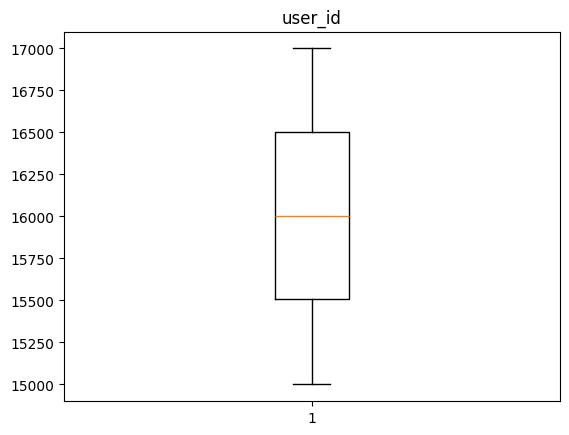

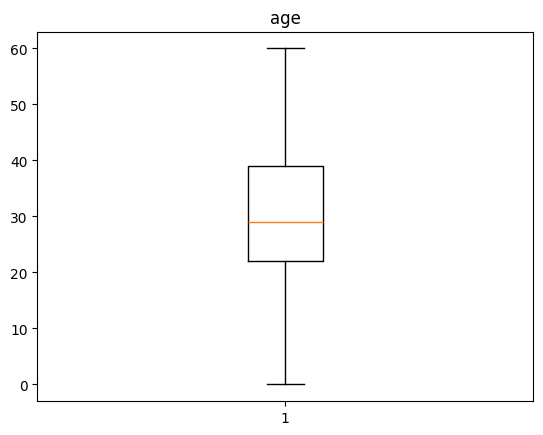

In [ ]:
for col in user_df.columns:
  if user_df[col].dtype!='object':
    plt.boxplot(user_df[col])#boxplot is used to view outliers
    plt.title(col)
    plt.show()

In [ ]:
#the outliers as been cleared

In [ ]:
user_df.head()

,user_id,name,email,age,country,date
0,15000,James Scott,james.scott660@gmail.com,35,India,2024-11-01
1,15001,Sharon Ferrell,sharon.ferrell49@gmail.com,26,Australia,2024-11-01
2,15002,Chelsea Ortiz,chelsea.ortiz643@gmail.com,38,United Kingdom,2024-11-01
3,15003,Gregory Pearson,gregory.pearson379@gmail.com,52,United Kingdom,2024-11-01
4,15004,Connie Gonzales,connie.gonzales481@gmail.com,43,Australia,2024-11-01


<BarContainer object of 1970 artists>

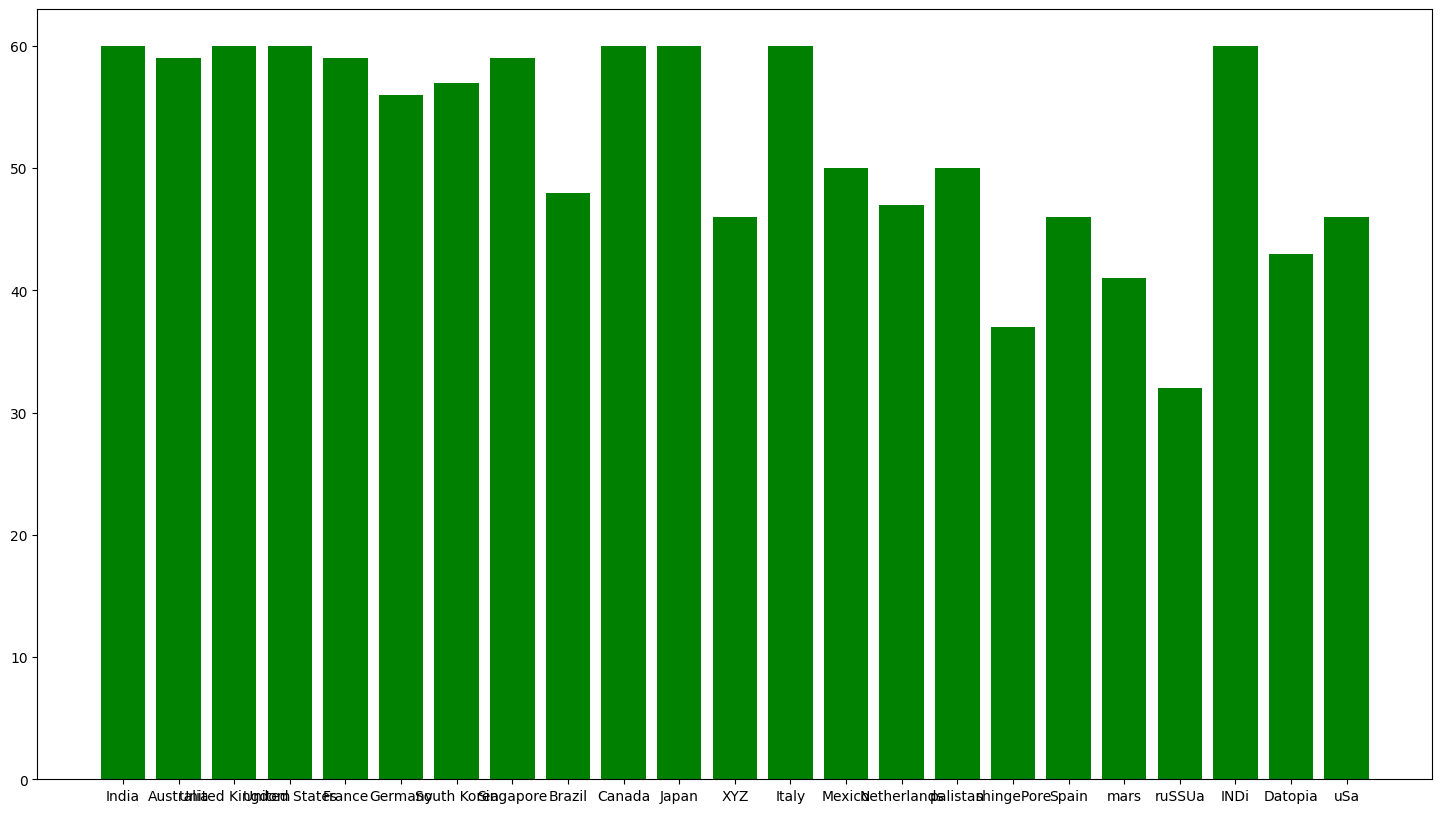

In [ ]:
#they have mentioned some people come from unbeliavble place
#lets check users places
plt.figure(figsize=(18,10))
plt.bar(user_df['country'],user_df['age'],color = 'green')

In [ ]:
user_df['country'].value_counts()

,count
country,
India,402
United States,383
United Kingdom,297
Australia,196
Canada,139
South Korea,117
Singapore,82
Germany,73
France,66


In [ ]:
#in the country column we can see that some user have entered their invalid country name
#now lets deal with it
in_valid = {'country':['INDi',	'shingePore',	'XYZ'	,'mars',	'palistan',	'Datopia',	'uSa',	'ruSSUa']}
pd.DataFrame(in_valid)
valid=['India'
,'United States'
,'United Kingdom'
,'Australia'
,'Canada'
,'South Korea'
,'Singapore'
,'Germany'
,'France'
,'Brazil'
,'Japan'
,'Mexico'
,'Italy'
,'Spain'
,'Netherlands']
def fix_spell(country_name):
  return min(valid, key=lambda x: sum(c1 != c2 for c1, c2 in zip(country_name.lower(), x.lower())) + abs(len(country_name) - len(x)))

user_df['country'] = user_df['country'].apply(fix_spell)

user_df

,user_id,name,email,age,country,date
0,15000,James Scott,james.scott660@gmail.com,35,India,2024-11-01
1,15001,Sharon Ferrell,sharon.ferrell49@gmail.com,26,Australia,2024-11-01
2,15002,Chelsea Ortiz,chelsea.ortiz643@gmail.com,38,United Kingdom,2024-11-01
3,15003,Gregory Pearson,gregory.pearson379@gmail.com,52,United Kingdom,2024-11-01
4,15004,Connie Gonzales,connie.gonzales481@gmail.com,43,Australia,2024-11-01
...,...,...,...,...,...,...
2046,16996,Erin Jacobs,erin.jacobs381@gmail.com,26,India,2025-01-30
2047,16997,Deanna Randolph,deanna.randolph420@gmail.com,27,United States,2025-01-30
2048,16998,Brandon Jacobs,brandon.jacobs266@gmail.com,21,United Kingdom,2025-01-30
2049,16999,Frederick Bell,frederick.bell509@gmail.com,60,United Kingdom,2025-01-30


In [ ]:
user_df['country'].value_counts()

,count
country,
India,418
United States,383
United Kingdom,297
Australia,196
Canada,146
South Korea,123
Singapore,82
Germany,73
France,66


In [ ]:
sub_df = pd.read_csv("/content/subscriptions.csv")
sub_df

,payment_id,user_id,amount,payment_date,plan_type,valid_until,churn_status,renewed
0,T67951961023,15000,12.99,2024-11-01,Premium,2024-12-31,active,True
1,T68965430008,15000,12.99,2025-01-05,Premium,2025-03-06,active,True
2,T56296958896,15000,7.99,2025-03-08,Standard,2025-04-07,active,True
3,T77025305054,15001,7.99,2024-11-01,Standard,2024-12-01,active,True
4,T73938493845,15001,7.99,2024-12-04,Standard,2025-01-03,churned,False
...,...,...,...,...,...,...,...,...
4384,T61215960241,16997,7.99,2025-01-30,Standard,2025-03-01,churned,False
4385,T88542550813,16998,4.99,2025-01-30,Student Plan,2025-03-01,active,True
4386,T98061873662,16998,4.99,2025-03-06,Student Plan,2025-04-05,active,True
4387,T81983567783,16999,12.99,2025-01-30,Premium,2025-03-31,churned,False


In [ ]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4389 entries, 0 to 4388
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   payment_id    4389 non-null   object 
 1   user_id       4389 non-null   int64  
 2   amount        4389 non-null   float64
 3   payment_date  4389 non-null   object 
 4   plan_type     4389 non-null   object 
 5   valid_until   4389 non-null   object 
 6   churn_status  4389 non-null   object 
 7   renewed       4389 non-null   bool   
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 244.4+ KB


In [ ]:
#EDA process
sub_df.isnull().sum()
#by the grace of god there is no null values

,0
payment_id,0
user_id,0
amount,0
payment_date,0
plan_type,0
valid_until,0
churn_status,0
renewed,0


In [ ]:
#duplicates
sub_df.duplicated().sum()

np.int64(101)

In [ ]:
#there are 101 null values
sub_df.drop_duplicates(inplace=True)

In [ ]:
sub_df.duplicated().sum()

np.int64(0)

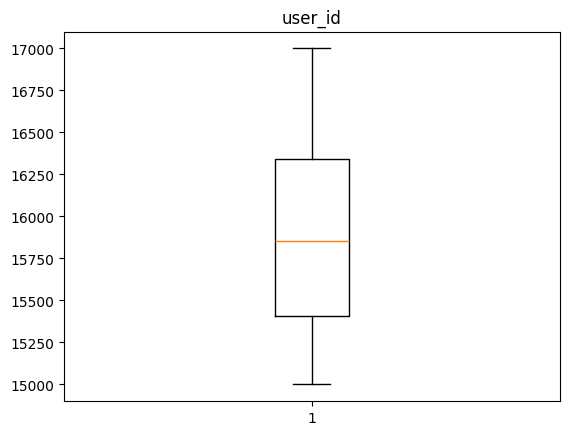

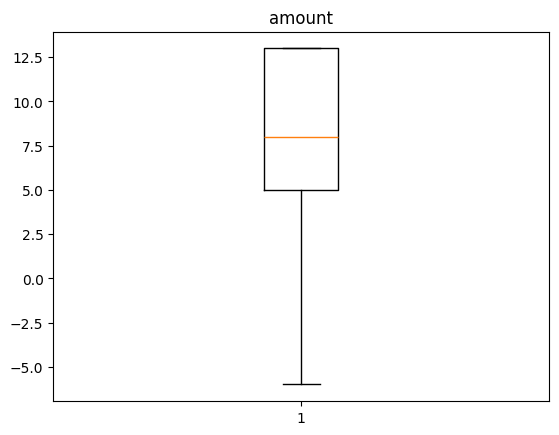

In [ ]:
for col in sub_df.columns:
  if sub_df[col].dtype.name not in ['object','bool']:
    plt.boxplot(sub_df[col])#boxplot is used to view outliers
    plt.title(col)
    plt.show()

In [ ]:
#no outliers

In [ ]:
watch_df = pd.read_csv("/content/watch_history.csv")
watch_df

,watch_id,user_id,movie_id,watch_date,watch_duration,device_type
0,W20000,15013,2027,2024-11-01,115.0,Laptop
1,W20001,15008,2393,2024-11-01,135.0,Mobile
2,W20002,15015,437,2024-11-01,106.0,Laptop
3,W20003,15006,279,2024-11-01,9.0,Smart TV
4,W20004,15004,1137,2024-11-01,99.0,Mobile
...,...,...,...,...,...,...
98918,W118918,16649,2247,2025-03-14,113.0,Laptop
98919,W118919,16036,238,2025-03-14,106.0,Mobile
98920,W118920,16508,2835,2025-03-14,6.0,Laptop
98921,W118921,16847,2418,2025-03-14,9.0,Laptop


In [ ]:
watch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98923 entries, 0 to 98922
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   watch_id        98923 non-null  object 
 1   user_id         98923 non-null  int64  
 2   movie_id        98923 non-null  int64  
 3   watch_date      98923 non-null  object 
 4   watch_duration  98787 non-null  float64
 5   device_type     98726 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
watch_df.isnull().sum()

,0
watch_id,0
user_id,0
movie_id,0
watch_date,0
watch_duration,136
device_type,197


In [ ]:
watch_df.isnull().sum().sum()

np.int64(333)

In [ ]:
watch_df.dropna(inplace=True)

In [ ]:
watch_df.isnull().sum().sum()

np.int64(0)

In [ ]:
watch_df.duplicated().sum()

np.int64(0)

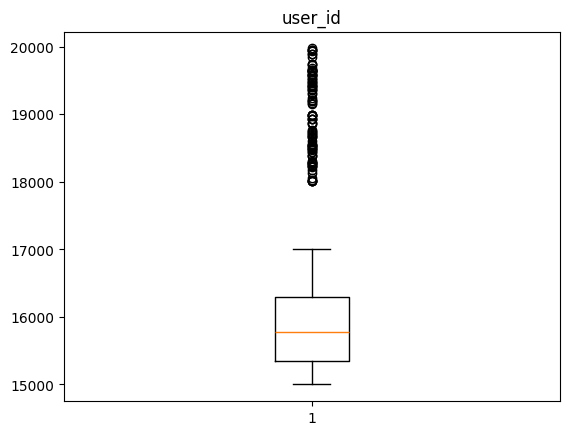

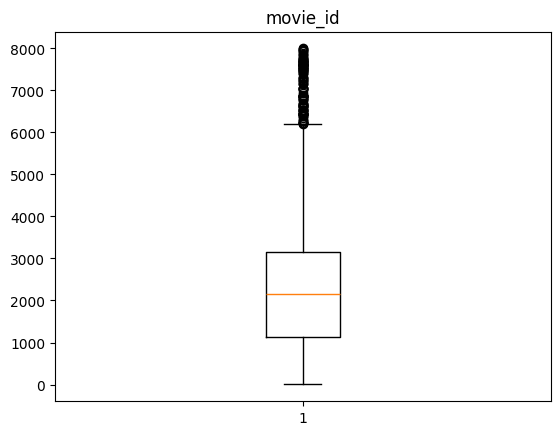

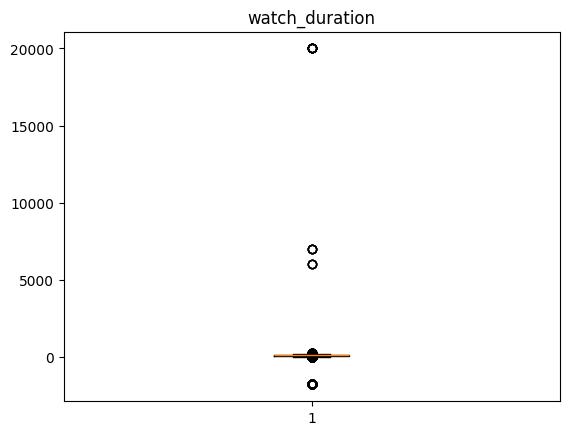

In [ ]:
for col in watch_df.columns:
  if watch_df[col].dtype!= 'object':
    plt.boxplot(watch_df[col])#boxplot is used to view outliers
    plt.title(col)
    plt.show()

In [ ]:
#we have more than 30% datapoints as ouliers

In [ ]:
#as we can see we have more outliers
#but user_id and movie_id doesn't affect our data
#as both the columns means user-id and movie_id must be unquie for each user and movie we can give any ids to identify them
#but in watch_duration  some users may liked the movie very much and watched many time and some may not liked it and stopped at the strating of the movie

In [ ]:
#dealing with outlier
Q1 = watch_df['watch_duration'].quantile(0.25) # the value which is less than 25% and the values greater than 75% is considered as outliers
Q3 = watch_df['watch_duration'].quantile(0.75)
IQR = Q3-Q1  #IQR refers to Inter Quatile Range
Lower_fence = Q1-1.5*IQR
upper_fence = Q3+1.5*IQR
watch_df = watch_df[(watch_df['watch_duration']>=Lower_fence) & (watch_df['watch_duration']<=upper_fence)]

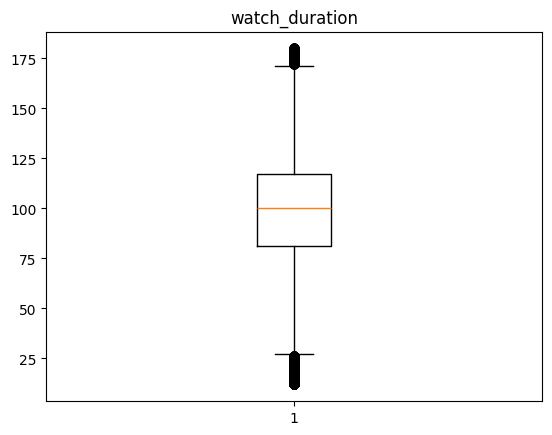

In [ ]:
plt.boxplot(watch_df['watch_duration'])#boxplot is used to view outliers
plt.title('watch_duration')
plt.show()

In [ ]:
watch_df["device_type"].value_counts()

,count
device_type,
Laptop,40099
Smart TV,31858
Mobile,21263
Washing Machine,196
Shoe Box,190
Toaster,181


In [ ]:
valid_devices= ['Laptop','Smart TV','Mobile']

watch_df['device_type'] = watch_df['device_type'].apply(lambda x: x if x in valid_devices else 'Other')


<ipython-input-59-99e1b5041280>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  watch_df['device_type'] = watch_df['device_type'].apply(lambda x: x if x in valid_devices else 'Other')


In [ ]:
watch_df["device_type"].value_counts()

,count
device_type,
Laptop,40099
Smart TV,31858
Mobile,21263
Other,567


In [ ]:
rating = pd.read_csv('/content/ratings.csv')
rating

,rating_id,user_id,movie_id,rating,review_date
0,R10001,15004,1137,4.0,2024-11-01
1,R10002,15017,1208,4.5,2024-11-01
2,R10003,15000,1433,4.0,2024-11-01
3,R10004,15021,2701,3.5,2024-11-01
4,R10005,15035,3710,4.5,2024-11-02
...,...,...,...,...,...
26747,R28585,16353,2227,1.5,2025-02-12
26748,R28477,15998,1053,3.5,2025-02-12
26749,R14511,15488,1413,2.5,2024-12-21
26750,R30634,16904,622,3.0,2025-02-19


In [ ]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26752 entries, 0 to 26751
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rating_id    26752 non-null  object 
 1   user_id      26752 non-null  int64  
 2   movie_id     26752 non-null  int64  
 3   rating       26540 non-null  float64
 4   review_date  26752 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 1.0+ MB


In [ ]:
rating.isnull().sum()

,0
rating_id,0
user_id,0
movie_id,0
rating,212
review_date,0


In [ ]:
rating.dropna(inplace=True)
rating.isnull().sum()

,0
rating_id,0
user_id,0
movie_id,0
rating,0
review_date,0


In [ ]:
rating.duplicated().sum()

np.int64(14)

In [ ]:
rating.drop_duplicates(inplace=True)

In [ ]:
rating.duplicated().sum()

np.int64(0)

In [ ]:
rating['rating'].value_counts()

,count
rating,
4.500000,6311
5.000000,6277
4.000000,5266
3.500000,3235
3.000000,2044
2.500000,1302
2.000000,756
1.500000,360
1.000000,261


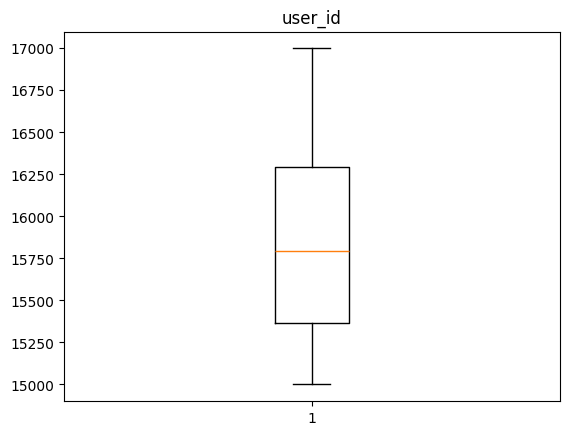

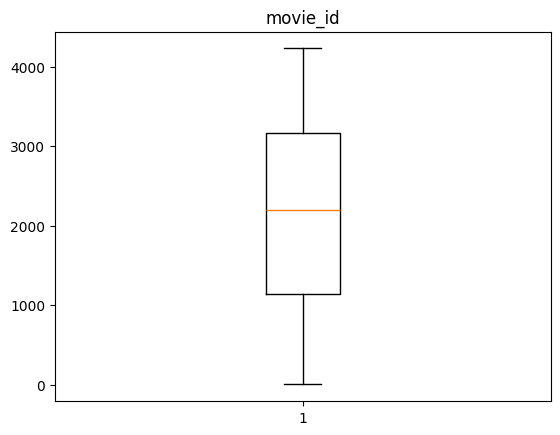

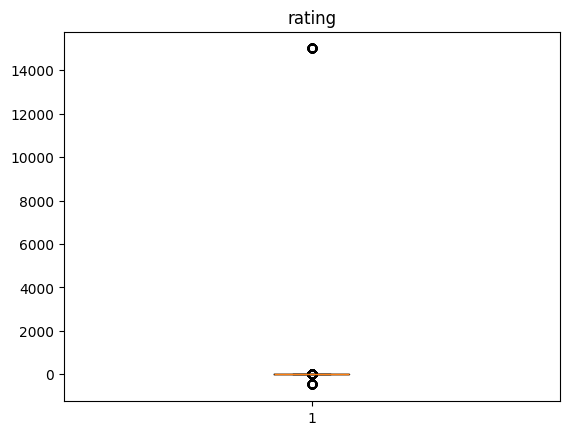

In [ ]:
for col in rating.columns:
  if rating[col].dtype!= 'object':
    plt.boxplot(rating[col])#boxplot is used to view outliers
    plt.title(col)
    plt.show()

In [ ]:
#i think there are 3 outliers and 1 is very high near to 14000
# as review ranges from 0-5
#we can remove rest

In [ ]:
Q1 = rating['rating'].quantile(0.25) # the value which is less than 25% and the values greater than 75% is considered as outliers
Q3 = rating['rating'].quantile(0.75)
IQR = Q3-Q1  #IQR refers to Inter Quatile Range
Lower_fence = Q1-1.5*IQR
upper_fence = Q3+1.5*IQR
rating = rating[(rating['rating']>=Lower_fence) & (rating['rating']<=upper_fence)]

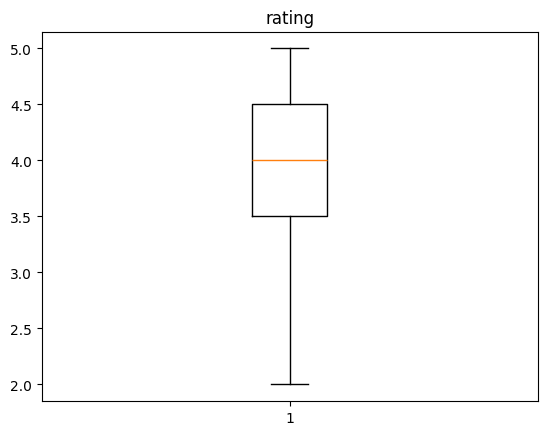

In [ ]:
plt.boxplot(rating['rating'])#boxplot is used to view outliers
plt.title('rating')
plt.show()

In [ ]:
rating['rating'].value_counts()

,count
rating,
4.500000,6311
5.000000,6277
4.000000,5266
3.500000,3235
3.000000,2044
2.500000,1302
2.000000,756
3.158917,70
4.126476,66


In [ ]:
#as we can see we have more +ve reviews hence we can trust the rating and the movie would be good to watch

In [ ]:
mov = pd.read_csv("/content/movies.csv")
mov

,movie_id,title,release_year,runtime,genre
0,1,Black Panther: Wakanda Forever,2022.0,161,action
1,2,Avatar: The Way of Water,2022.0,192,action
2,3,Plane,2023.0,107,action
3,4,Everything Everywhere All at Once,2022.0,139,action
4,5,Ant-Man and the Wasp: Quantumania,2023.0,125,action
...,...,...,...,...,...
4224,4225,Tears of the Sun,2003.0,121,war
4225,4226,Freedom's Path,2022.0,131,war
4226,4227,Zulu,1964.0,138,war
4227,4228,Never Look Away,2018.0,189,war


In [ ]:
mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4229 entries, 0 to 4228
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_id      4229 non-null   int64  
 1   title         4229 non-null   object 
 2   release_year  4228 non-null   float64
 3   runtime       4229 non-null   int64  
 4   genre         4229 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 165.3+ KB


In [ ]:
mov.isnull().sum()

,0
movie_id,0
title,0
release_year,1
runtime,0
genre,0


In [ ]:
mov.dropna(inplace=True)

In [ ]:
mov.isnull().sum()

,0
movie_id,0
title,0
release_year,0
runtime,0
genre,0


In [ ]:
mov.duplicated().sum()

np.int64(0)

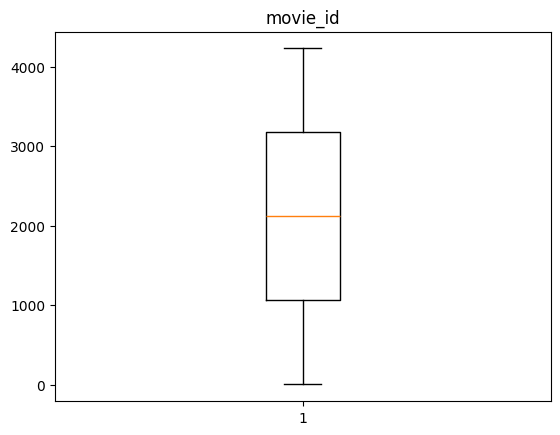

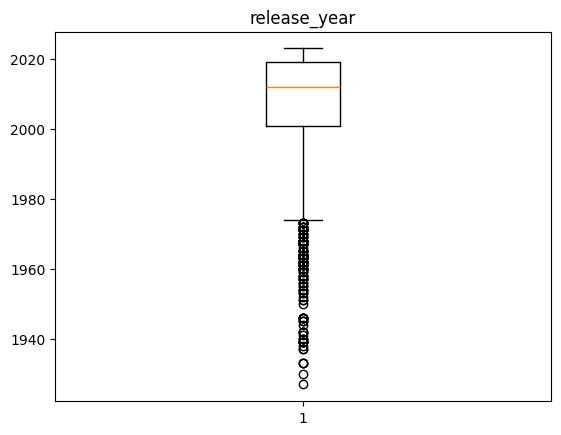

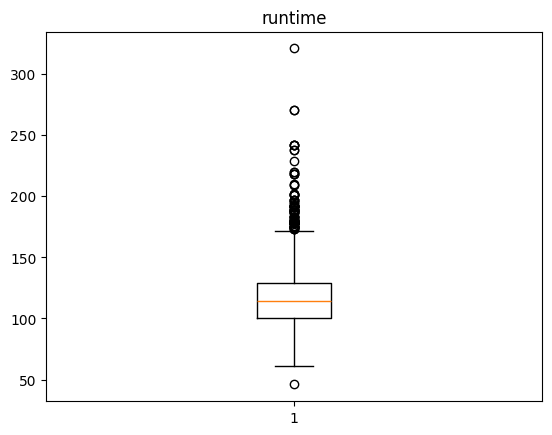

In [ ]:
for col in mov.columns:
  if mov[col].dtype!= 'object':
    plt.boxplot(mov[col])#boxplot is used to view outliers
    plt.title(col)
    plt.show()

In [ ]:
#different movies have different running time and the run time i took is based on mintues
#as now many movies are with high run time
#we can keep the run_time outliers
#some movies have would be released before 2000
#they may also be  added in the app
#like old generation may like to see them again
# and memember thier old memories

In [ ]:
user_df.to_csv('cleaned_dataset.csv', index=False)

# Download the file
from google.colab import files
files.download('cleaned_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
mov.to_csv('cleaned_dataset.csv', index=False)

# Download the file
from google.colab import files
files.download('cleaned_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
rating.to_csv('cleaned_dataset.csv', index=False)

# Download the file
from google.colab import files
files.download('cleaned_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
user_df.to_csv('cleaned_dataset.csv', index=False)

# Download the file
from google.colab import files
files.download('cleaned_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
watch_df.to_csv('cleaned_dataset.csv', index=False)

# Download the file
from google.colab import files
files.download('cleaned_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>